In [365]:
'''Prueba de datos Data Scientist

Un cliente nos ha proporcionado un set de datos para que le ayudemos con la
predicción de las ventas para sus productos los próximos meses.

El conjunto de datos proporcionado se compone de:

Un maestro o catálogo de productos (maestro_productos_prueba.csv):
contiene toda la información disponible relativa a los productos que
vende el cliente y competidores


Un maestro o catálogo de clientes (maestro_clientes_prueba): contiene
toda la información disponible sobre las tiendas y distribuidores que
venden los productos del cliente


Archivos de venta de sellout para dos proveedores diferentes (sellout
proveedor1.csv y sellout-proveedor2.csv): contiene histórico de ventas
y precio de sellout (del retailer a consumidor final) para cada producto
y cada tienda.


El objetivo es realizar la preparación y exploración de los datos así como el
entrenamiento de un modelo predictivo para la predicción de la demanda.


Bonus:

Nuestro cliente también está interesado en saber el precio óptimo de cada
producto que maximice sus ventas el próximo mes.
'''

'Prueba de datos Data Scientist\n\nUn cliente nos ha proporcionado un set de datos para que le ayudemos con la\npredicción de las ventas para sus productos los próximos meses.\n\nEl conjunto de datos proporcionado se compone de:\n\nUn maestro o catálogo de productos (maestro_productos_prueba.csv):\ncontiene toda la información disponible relativa a los productos que\nvende el cliente y competidores\n\n\nUn maestro o catálogo de clientes (maestro_clientes_prueba): contiene\ntoda la información disponible sobre las tiendas y distribuidores que\nvenden los productos del cliente\n\n\nArchivos de venta de sellout para dos proveedores diferentes (sellout\nproveedor1.csv y sellout-proveedor2.csv): contiene histórico de ventas\ny precio de sellout (del retailer a consumidor final) para cada producto\ny cada tienda.\n\n\nEl objetivo es realizar la preparación y exploración de los datos así como el\nentrenamiento de un modelo predictivo para la predicción de la demanda.\n\n\nBonus:\n\nNuestro cl

In [1]:
#Comenzamos importando las librerías escenciales
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

#comenzamos la carga de la data. Por el momento basta con Productos y ventas de proveedores
# clientes= pd.read_excel(r'C:\Users\ARMANDO\Downloads\Prueba técnica Data Scientist WA\Prueba técnica Data Scientist WA\maestro_clientes_prueba.xlsx')
# clientes
productos= pd.read_csv(r'C:\Users\ARMANDO\Downloads\Prueba técnica Data Scientist WA\Prueba técnica Data Scientist WA\maestro_productos_prueba.csv')
# productos
sellout_proveedor1= pd.read_csv(r'C:\Users\ARMANDO\Downloads\Prueba técnica Data Scientist WA\Prueba técnica Data Scientist WA\sellout-proveedor1.csv')
sellout_proveedor2= pd.read_csv(r'C:\Users\ARMANDO\Downloads\Prueba técnica Data Scientist WA\Prueba técnica Data Scientist WA\sellout-proveedor2.csv')

In [2]:
''' 
se detectan problemas con la calidad de los datos 

a) Precios negativos 
b) Cantidades negativas 
c) Proveedor 2 Prices(Units) 
d) Proveedor 2 precios con formato "$", procedemos a solucionarlos
e) Duplicados en ambos catálogos
f) sacarles source y concatenarlos---> ventas_Fact
g) Fechas inválidas
h) un unico Sku para LECHE... sin correspondencia en productos (#el problema aqui si es que hay 465 filas con NAN
sellout_proveedor1[sellout_proveedor1['Sku']==5027], El problema es con los SKU's 5007624 y 5027 no parece haber una relacion entre ellos para asumir que son el mismo.)
i) hay qeu tener en cuenta que son dos subcategorías... 1241 descripcoines

Adicionalmente se detectaron problemas con la distribucion de los datos
1) Outliers
2) Las distribuciones de los datos varían mucho entre catálogos y categorías
    2.1) Modelo para proveedor 1 LOG - LOG para linealizarlo ---> estratégia se puede separar por subcategoría
    2.2) Modelo para proveedor 2 "*" (podrían ser tres modelos diferentes)-----> estratégia se puede clusterizar

Estrategia a seguir para completar la tarea:


Si juntamos los dos modelos, probablemente no tengamos buenos resultados
Se puede hacer un modelopredictivo para cada proveedor...
Se puede unir en un solo dataset y usar un deeplearning, eso dificultaría encontrar los valores óptimos(máximos) para cada cantidad y precios

Tareas a realizar:
#EDA...
---------preparación de los datos--------------
*Limpieza de los datos
0) verificación de nulos
a) "Pieces" en lugar de Units
b) Proveedor 2 precios con formato "$" a número
c) Precios negativos 
d) Cantidades negativas 

e) Duplicados en ambos catálogos
f) Creación de un campo de "Source" por proveedor en sus tablas correspoientes
g) Fechas inválidas
i) Pegar las descripciones de producto y subcategorías inner Join con productos

*exploración de las distribuciones
a) series de tiempo
b) Histográmas
c) Disperción

*Creación de los modelos
a) un modelo para proveedor1
b) un modelo para proveedor2
b) un modelo para series temporales

*Forma de la demanda, elasticidades y precio óptimo
a) Calculo de la función de demanda y la elasticidad
b) Programa de maximización de precios

#problema con los Sku, sku_subcategory:
# productos[productos['Sku']==5027] del proveedor1
# ok,  solo hay un Corn Orio/LECHES UHT# hay que borrarlo
'''

' \nse detectan problemas con la calidad de los datos \n\na) Precios negativos \nb) Cantidades negativas \nc) Proveedor 2 Prices(Units) \nd) Proveedor 2 precios con formato "$", procedemos a solucionarlos\ne) Duplicados en ambos catálogos\nf) sacarles source y concatenarlos---> ventas_Fact\ng) Fechas inválidas\nh) un unico Sku para LECHE... sin correspondencia en productos (#el problema aqui si es que hay 465 filas con NAN\nsellout_proveedor1[sellout_proveedor1[\'Sku\']==5027], El problema es con los SKU\'s 5007624 y 5027 no parece haber una relacion entre ellos para asumir que son el mismo.)\ni) hay qeu tener en cuenta que son dos subcategorías... 1241 descripcoines\n\nAdicionalmente se detectaron problemas con la distribucion de los datos\n1) Outliers\n2) Las distribuciones de los datos varían mucho entre catálogos y categorías\n    2.1) Modelo para proveedor 1 LOG - LOG para linealizarlo ---> estratégia se puede separar por subcategoría\n    2.2) Modelo para proveedor 2 "*" (podrían

In [2]:
#EDA...
d1=sellout_proveedor1.describe().round(2)
d2=sellout_proveedor2.describe().round(2)
print(d1)
print('-----------------------------------------------------------')
print(d2)
print('************************************************************************************************************')
#-------------------------------------------------------------------------------------------------------------------------
# 0) verificación de nulos
# a) "Pieces" en lugar de Units
# b) Proveedor 2 precios con formato "$" a número
print(sellout_proveedor1.isnull().sum())
print(sellout_proveedor2.isnull().sum())

#arreglamos los problemas del proveedor 2
#sellout_proveedor1.describe().round(2)
print('sustituyendo...Pieces por Units...')
sellout_proveedor2.rename(columns={'Pieces': 'Units'}, inplace=True)
print('done.')
print('Arreglando el formato de varo $...')
sellout_proveedor2['Price'] = sellout_proveedor2['Price'].replace('[\$,]', '', regex=True).astype(float)
print('done:')
print(sellout_proveedor2['Price'])

print('************************************************************************************************************')
#---------------------------------------------------------------------------------------------------------------------------- 
#c) Precios negativos 
# d) Cantidades negativas 
#   Verificar todos los valores negativos en las columnas Units y Price para por proveedor, dada la naturaleza
#   del  problema estos valores no son poasibles
print('Obteniendo los valores negativos en proveedor 1...')
negative_units1 = sellout_proveedor1[sellout_proveedor1['Units'] < 0]
negative_price1 = sellout_proveedor1[sellout_proveedor1['Price'] < 0]

print("Núm-valores (-)) en 'Units1':", len(negative_units1))
print("Núm-valores (-)) en 'Price1':", len(negative_price1))

print('Obteniendo los valores negativos en proveedor 2...')
negative_units2 = sellout_proveedor2[sellout_proveedor2['Units'] < 0]
negative_price2 = sellout_proveedor2[sellout_proveedor2['Price'] < 0]

print("Núm-valores (-)) en 'Units2':", len(negative_units2))
print("Núm-valores (-)) en 'Price2':", len(negative_price2))

print('------------------------------------------------------------------------------------------------')
# Debido a que son muy pocas celdas con valores nulos procedemos a eliminarlos. su falta no es significativa
print('eliminando valores negativos...')
sellout_proveedor1 = sellout_proveedor1[sellout_proveedor1['Units'] >= 0]
sellout_proveedor1 = sellout_proveedor1[sellout_proveedor1['Price'] >= 0]

sellout_proveedor2 = sellout_proveedor2[sellout_proveedor2['Units'] >= 0]
sellout_proveedor2 = sellout_proveedor2[sellout_proveedor2['Price'] >= 0]
print('Verificando que no haya negativos en las columnas Units y Price ...')
#------------------------------------------verificamos con el codigo anterior---------------------------------
# Verificar valores negativos en las columnas Units y Price para los dos proveedores, estos valores no son poasibles
negative_units1 = sellout_proveedor1[sellout_proveedor1['Units'] < 0]
negative_price1 = sellout_proveedor1[sellout_proveedor1['Price'] < 0]

print("Núm-valores (-)) en 'Units1':", len(negative_units1))
print("Núm-valores (-)) en 'Price1':", len(negative_price1))

# Verificar valores negativos en las columnas Units y Price
negative_units2 = sellout_proveedor2[sellout_proveedor2['Units'] < 0]
negative_price2 = sellout_proveedor2[sellout_proveedor2['Price'] < 0]

print("Núm-valores (-)) en 'Units2':", len(negative_units2))
print("Núm-valores (-)) en 'Price2':", len(negative_price2))


              Sku    Store_Id       Units       Price
count  1206365.00  1206365.00  1206365.00  1206365.00
mean   4563697.95      255.23       15.37       14.28
std     200176.19      242.66       62.14       18.01
min       5027.00        2.00     -675.45     -190.05
25%    4422187.00       68.00        0.00        0.00
50%    4604976.00      146.00        0.45       13.28
75%    4709131.00      603.00        7.20       18.00
max    4829827.00      712.00    19354.00      871.93
-----------------------------------------------------------
              Sku    Store_Id      Pieces
count  4862029.00  4862029.00  4862029.00
mean   4441615.56     2868.31       20.11
std     149014.58     1188.90       55.32
min    4240039.00       58.00      -60.00
25%    4290336.00     1884.00        1.00
50%    4422187.00     2883.00        3.60
75%    4554143.00     3786.00       14.00
max    4729193.00     5855.00     2102.00
****************************************************************************

In [3]:
# e) Duplicados en ambos catálogos
#valores duplicados en proveedor2?
# antes de proceder a gráficar hay que eliminar los duplicados si l hubiera:
numrow2_ori=len(sellout_proveedor2['Units'])

print(f'# filas antes de eliminar duplicados:{numrow2_ori}' )

if sellout_proveedor2.duplicated().any():
    print("filas duplicadas en sellout_proveedor2. Eliminando...")
    sellout_proveedor2 = sellout_proveedor2.drop_duplicates()
    print("Las filas duplicadas han sido eliminadas.")
else:
    print('Sin filas duplicadas')

numrow2_after=len(sellout_proveedor2['Units'])

print(f'# filas después de quitar duplicados: {numrow2_after}')
print(f'se quitaron {numrow2_ori-numrow2_after} filas.')

print('-----------------------------------------------------------------------------------------------')
#Lo mismo para el proveedor 1...

numrow1_ori=len(sellout_proveedor1['Units'])

print(f'# filas antes de eliminar duplicados:{numrow1_ori}' )

if sellout_proveedor1.duplicated().any():
    print("filas duplicadas en sellout_proveedor1. Eliminando...")
    sellout_proveedor1 = sellout_proveedor2.drop_duplicates()
    print("Las filas duplicadas han sido eliminadas.")
else:
    print('Sin filas duplicadas')

numrow1_after=len(sellout_proveedor1['Units'])

print(f'# filas después de quitar duplicados: {numrow1_after}')
print(f'se quitaron {numrow1_ori-numrow1_after} filas.')

# filas antes de eliminar duplicados:4861733
filas duplicadas en sellout_proveedor2. Eliminando...
Las filas duplicadas han sido eliminadas.
# filas después de quitar duplicados: 4861730
se quitaron 3 filas.
-----------------------------------------------------------------------------------------------
# filas antes de eliminar duplicados:1206288
Sin filas duplicadas
# filas después de quitar duplicados: 1206288
se quitaron 0 filas.


In [4]:
# f) sacarles source y concatenarlos---> ventas_Fact 
# Concatenar los datos de los proveedores 
# Agregar columna 'Source' a cada DataFrame
sellout_proveedor1['Source'] = 'proveedor_1'
sellout_proveedor2['Source'] = 'proveedor_2'
sellout = pd.concat([sellout_proveedor1, sellout_proveedor2])
print('tabla sellout creada...')

tabla sellout creada...


In [5]:
#g) Fechas inválidas - comprovacion de las fechas 
import re
def extraer_fecha(fecha):
    match = re.search(r'\d{4}-\d{2}-\d{2}', fecha)
    if match:
        return match.group(0)
    else:
        return fecha

sellout['Date'] = sellout['Date'].apply(extraer_fecha)
sellout['Date']= sellout['Date'].str.replace('/', '-')

# Formato datetime
sellout['Date'] = pd.to_datetime(sellout['Date'], format='%Y-%m-%d', errors='coerce')

# Fechas inválidas
num_fechas_unicas = sellout['Date'].nunique()
fechas_invalidas = sellout['Date'].isna().sum()

print(sellout_proveedor2['Date'])
print(f"Núm fechas únicas: {num_fechas_unicas}")
print(f"Núm fechas inválidas: {fechas_invalidas}")
sellout

0          2016/01/01
1          2016/01/01
2          2016/01/01
3          2016/01/01
4          2016/01/01
              ...    
4862024    2016/12/30
4862025    2016/12/30
4862026    2016/12/30
4862027    2016/12/30
4862028    2016/08/20
Name: Date, Length: 4861730, dtype: object
Núm fechas únicas: 397
Núm fechas inválidas: 0


,Sku,Date,Store_Id,Units,Price,Source
0,4220015,2017-01-01,18,6.0,15.60,proveedor_1
1,4220015,2017-01-01,24,0.0,0.00,proveedor_1
2,4220015,2017-01-01,39,0.0,0.00,proveedor_1
3,4220015,2017-01-01,44,0.0,0.00,proveedor_1
4,4220015,2017-01-01,46,0.0,0.00,proveedor_1
...,...,...,...,...,...,...
4862024,4729193,2016-12-30,5827,14.0,17.90,proveedor_2
4862025,4729193,2016-12-30,5850,3.0,17.90,proveedor_2
4862026,4729193,2016-12-30,5851,3.0,16.00,proveedor_2
4862027,4729193,2016-12-30,5855,21.0,16.86,proveedor_2


In [6]:
# i) Pegar las descripciones de producto y subcategorías inner Join con productos (6068018   -   6067553 = 465 Filas perdidas)
sellout_Fact = pd.merge(sellout, productos[['Sku','Sku_Description', 'Sku_Category', 'Sku_Subcategory']], on='Sku', how='inner')
sellout_Fact

,Sku,Date,Store_Id,Units,Price,Source,Sku_Description,Sku_Category,Sku_Subcategory
0,4220015,2017-01-01,18,6.0,15.60,proveedor_1,Stars Chocolate,Sugar-free,Cereal bars
1,4220015,2017-01-01,24,0.0,0.00,proveedor_1,Stars Chocolate,Sugar-free,Cereal bars
2,4220015,2017-01-01,39,0.0,0.00,proveedor_1,Stars Chocolate,Sugar-free,Cereal bars
3,4220015,2017-01-01,44,0.0,0.00,proveedor_1,Stars Chocolate,Sugar-free,Cereal bars
4,4220015,2017-01-01,46,0.0,0.00,proveedor_1,Stars Chocolate,Sugar-free,Cereal bars
...,...,...,...,...,...,...,...,...,...
6067548,4729193,2016-12-30,5827,14.0,17.90,proveedor_2,Coco Poops Chocolate Choc Chip,Sugar-free,Cereal bars
6067549,4729193,2016-12-30,5850,3.0,17.90,proveedor_2,Coco Poops Chocolate Choc Chip,Sugar-free,Cereal bars
6067550,4729193,2016-12-30,5851,3.0,16.00,proveedor_2,Coco Poops Chocolate Choc Chip,Sugar-free,Cereal bars
6067551,4729193,2016-12-30,5855,21.0,16.86,proveedor_2,Coco Poops Chocolate Choc Chip,Sugar-free,Cereal bars


In [7]:
#revisión de que el inner Join quedó bien:
duplic_rows=sellout_Fact.duplicated().sum()

if duplic_rows > 0:
    print(f"Número de filas duplicadas en sellout_Fact: {duplic_rows} arreglando el problema...")
    sellout_Fact = sellout_Fact.drop_duplicates()
    print("Las filas duplicadas han sido eliminadas.")
else:
    print('Sin filas duplicadas')
sellout_Fact

Sin filas duplicadas


,Sku,Date,Store_Id,Units,Price,Source,Sku_Description,Sku_Category,Sku_Subcategory
0,4220015,2017-01-01,18,6.0,15.60,proveedor_1,Stars Chocolate,Sugar-free,Cereal bars
1,4220015,2017-01-01,24,0.0,0.00,proveedor_1,Stars Chocolate,Sugar-free,Cereal bars
2,4220015,2017-01-01,39,0.0,0.00,proveedor_1,Stars Chocolate,Sugar-free,Cereal bars
3,4220015,2017-01-01,44,0.0,0.00,proveedor_1,Stars Chocolate,Sugar-free,Cereal bars
4,4220015,2017-01-01,46,0.0,0.00,proveedor_1,Stars Chocolate,Sugar-free,Cereal bars
...,...,...,...,...,...,...,...,...,...
6067548,4729193,2016-12-30,5827,14.0,17.90,proveedor_2,Coco Poops Chocolate Choc Chip,Sugar-free,Cereal bars
6067549,4729193,2016-12-30,5850,3.0,17.90,proveedor_2,Coco Poops Chocolate Choc Chip,Sugar-free,Cereal bars
6067550,4729193,2016-12-30,5851,3.0,16.00,proveedor_2,Coco Poops Chocolate Choc Chip,Sugar-free,Cereal bars
6067551,4729193,2016-12-30,5855,21.0,16.86,proveedor_2,Coco Poops Chocolate Choc Chip,Sugar-free,Cereal bars


C:\Users\ARMANDO\AppData\Local\Temp\ipykernel_33292\1731350798.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


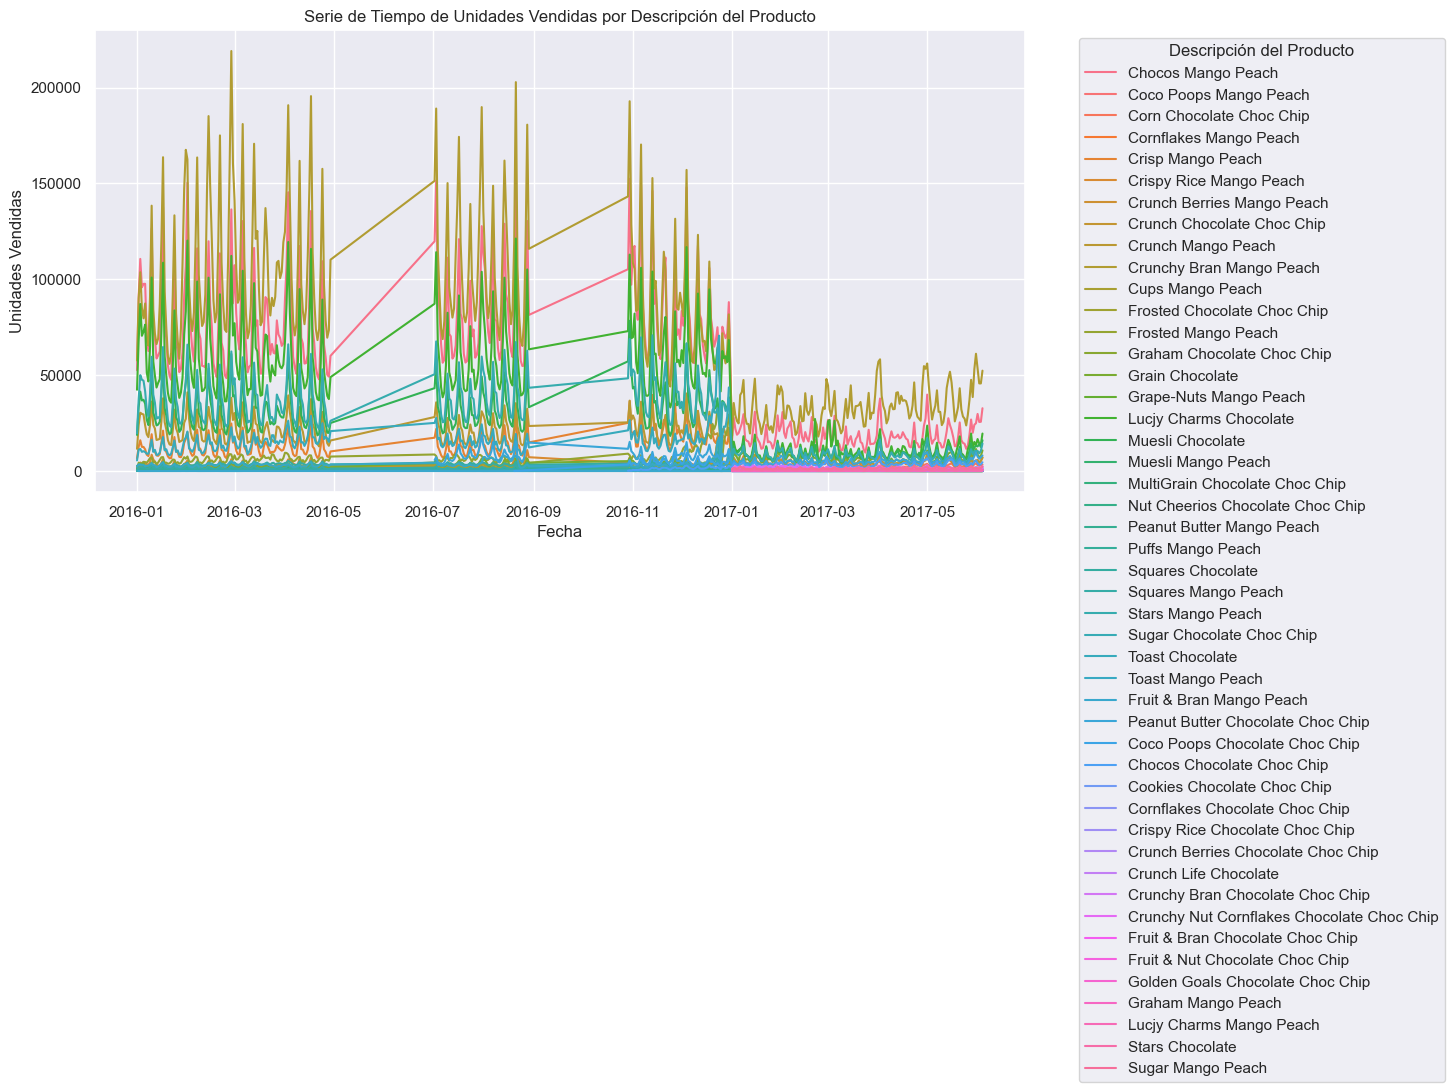

In [8]:
# *exploración de las distribuciones
# a) series de tiempo
productos.columns.values
#visualización de los datos por "producto (descripción)"
ventas_agrupadas = sellout_Fact.groupby(['Date', 'Sku_Description'])['Units'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")  


sns.lineplot(data=ventas_agrupadas, x='Date', y='Units', hue='Sku_Description')


plt.title('Serie de Tiempo de Unidades Vendidas por Descripción del Producto')
plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Descripción del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

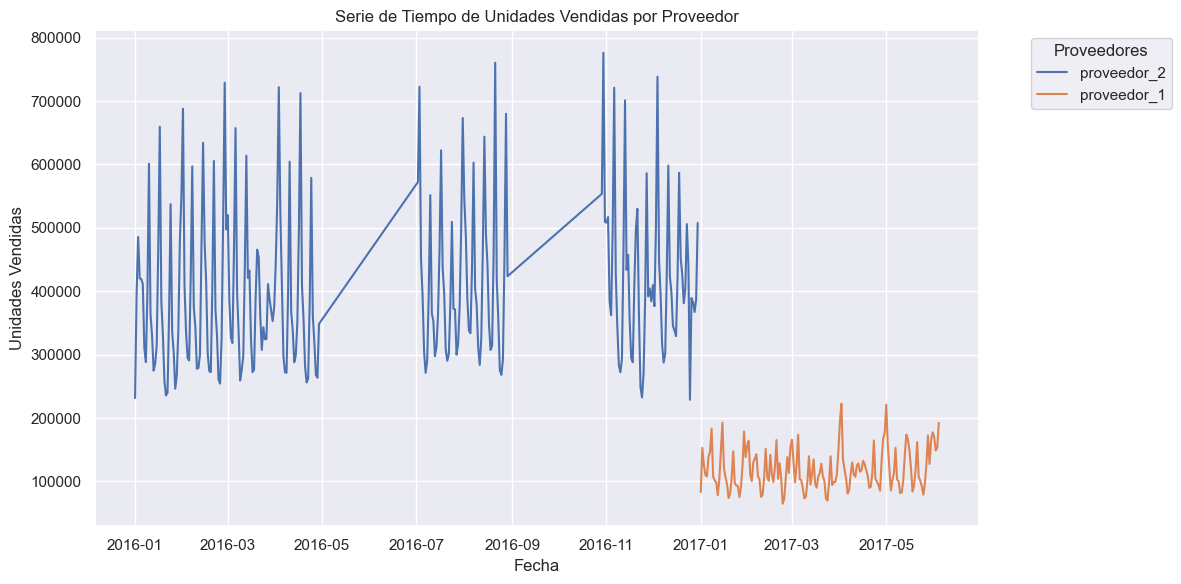

In [9]:
#visualización de los datos por "Proveedor"
ventas_agrupadas = sellout_Fact.groupby(['Date', 'Source'])['Units'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")  

sns.lineplot(data=ventas_agrupadas, x='Date', y='Units', hue='Source')

plt.title('Serie de Tiempo de Unidades Vendidas por Proveedor')
plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Proveedores', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#Los datos definitivamente no son comparables entre proveedores...
#la solución es hacer dos modelos de demanda y dos modelos predictivos


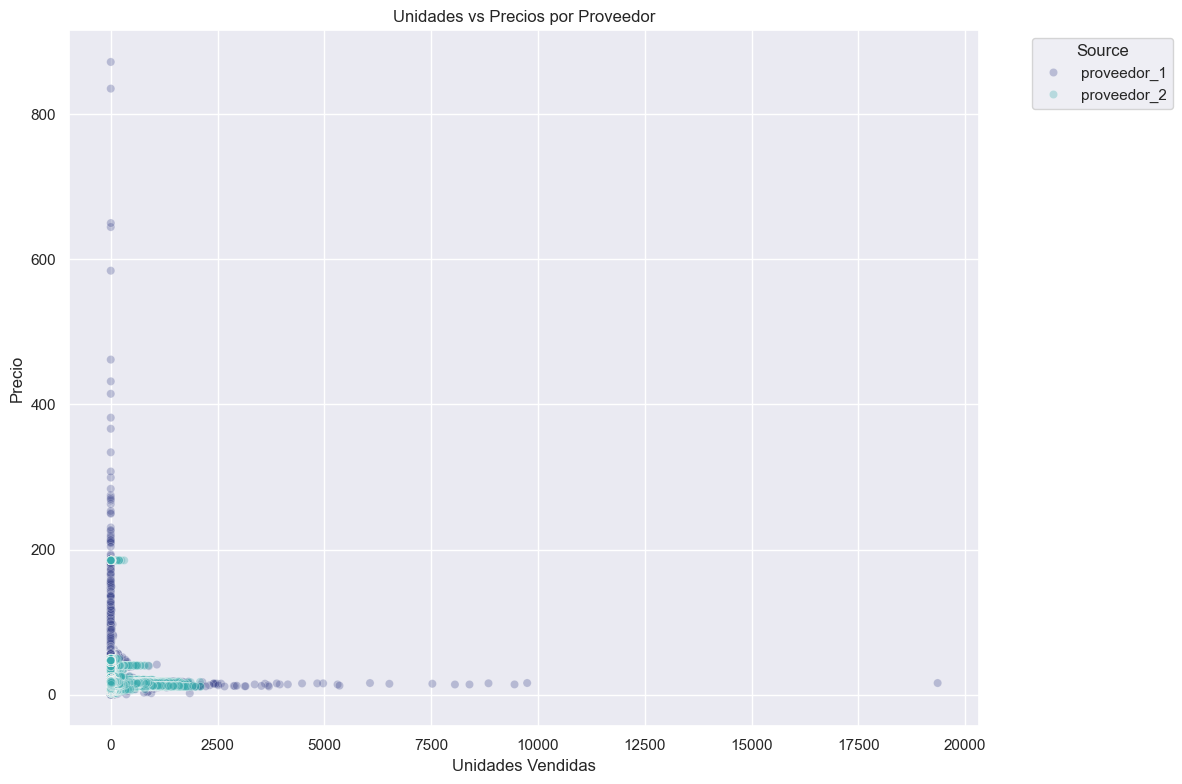

In [12]:

plt.figure(figsize=(12, 8))
sns.scatterplot(data=sellout_Fact, x='Units', y='Price', hue='Source', palette='mako', alpha=0.3)

plt.title('Unidades vs Precios por Proveedor')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Precio')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [13]:
# cte = 1
# sellout_Fact['log_Units_aj'] = np.log10(sellout_Fact['Units'] + cte)


0          1.791759
1              -inf
2              -inf
3              -inf
4              -inf
             ...   
6067548    2.639057
6067549    1.098612
6067550    1.098612
6067551    3.044522
6067552    2.484907
Name: LOG_Units, Length: 6067553, dtype: float64
0          2.747271
1              -inf
2              -inf
3              -inf
4              -inf
             ...   
6067548    2.884801
6067549    2.884801
6067550    2.772589
6067551    2.824944
6067552    2.610070
Name: LOG_Price, Length: 6067553, dtype: float64


c:\Users\ARMANDO\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ARMANDO\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
sellout_Fact['LOG_Units']= np.log(sellout_Fact['Units'])
print(sellout_Fact['LOG_Units'])
sellout_Fact['LOG_Price']= np.log(sellout_Fact['Price'])
print(sellout_Fact['LOG_Price'])
print(np.isneginf(sellout_Fact[sellout_Fact['Source']=='proveedor_1']['LOG_Units']).sum())
print(np.isneginf(sellout_Fact[sellout_Fact['Source']=='proveedor_2']['LOG_Units']).sum())
(np.isneginf(sellout_Fact[sellout_Fact['Source']=='proveedor_1']['LOG_Units']).sum())/len(sellout_proveedor1)*100


c:\Users\ARMANDO\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ARMANDO\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0          1.791759
1              -inf
2              -inf
3              -inf
4              -inf
             ...   
6067548    2.639057
6067549    1.098612
6067550    1.098612
6067551    3.044522
6067552    2.484907
Name: LOG_Units, Length: 6067553, dtype: float64
0          2.747271
1              -inf
2              -inf
3              -inf
4              -inf
             ...   
6067548    2.884801
6067549    2.884801
6067550    2.772589
6067551    2.824944
6067552    2.610070
Name: LOG_Price, Length: 6067553, dtype: float64
567537
0


47.048217341132464

In [11]:
print(np.isneginf(sellout_Fact[sellout_Fact['Source']=='proveedor_1']['LOG_Units']).sum())
print(np.isneginf(sellout_Fact[sellout_Fact['Source']=='proveedor_2']['LOG_Units']).sum())


567537
0


In [12]:
#hay muchos ceros ...
sellout_Fact_filtrado = sellout_Fact[sellout_Fact['Units'] > 0]

sellout_Fact_filtrado = sellout_Fact[sellout_Fact['Price'] > 0]

In [13]:
print(np.isneginf(sellout_Fact_filtrado[sellout_Fact_filtrado['Source']=='proveedor_1']['LOG_Units']).sum())
print(np.isneginf(sellout_Fact_filtrado[sellout_Fact_filtrado['Source']=='proveedor_2']['LOG_Units']).sum())
print(np.isneginf(sellout_Fact_filtrado[sellout_Fact_filtrado['Source']=='proveedor_1']['Price']).sum())
print(np.isneginf(sellout_Fact_filtrado[sellout_Fact_filtrado['Source']=='proveedor_2']['Price']).sum())

0
0
0
0


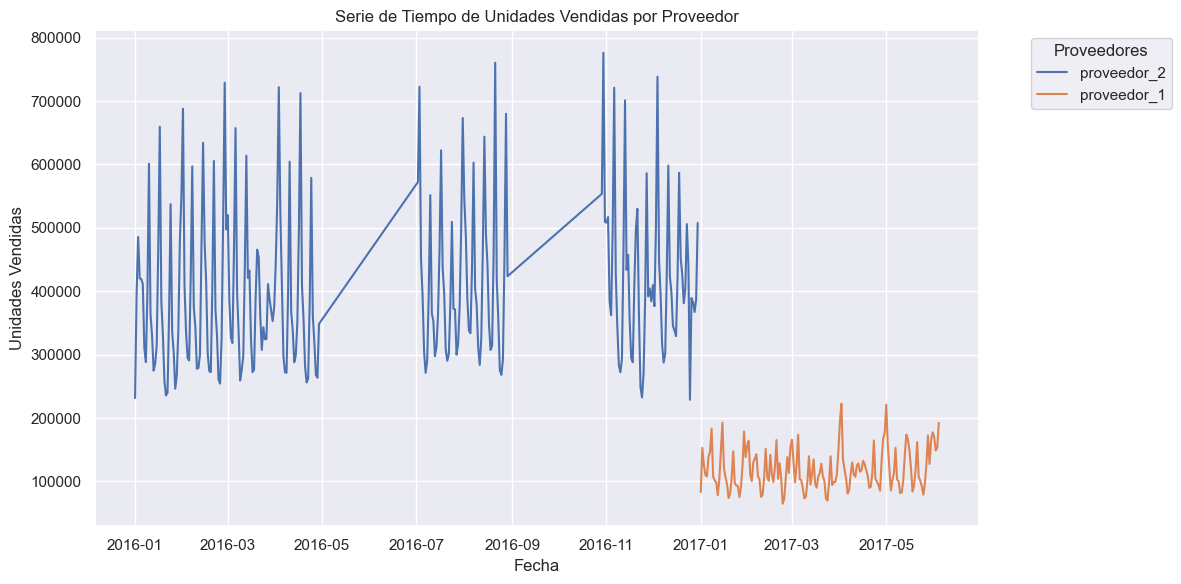

In [14]:
#visualización de los datos por "Proveedor"
ventas_agrupadas2 = sellout_Fact_filtrado.groupby(['Date', 'Source'])['Units'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")  

sns.lineplot(data=ventas_agrupadas, x='Date', y='Units', hue='Source')

plt.title('Serie de Tiempo de Unidades Vendidas por Proveedor')
plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Proveedores', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#Los datos definitivamente no son comparables entre proveedores...
#la solución es hacer dos modelos de demanda y dos modelos predictivos

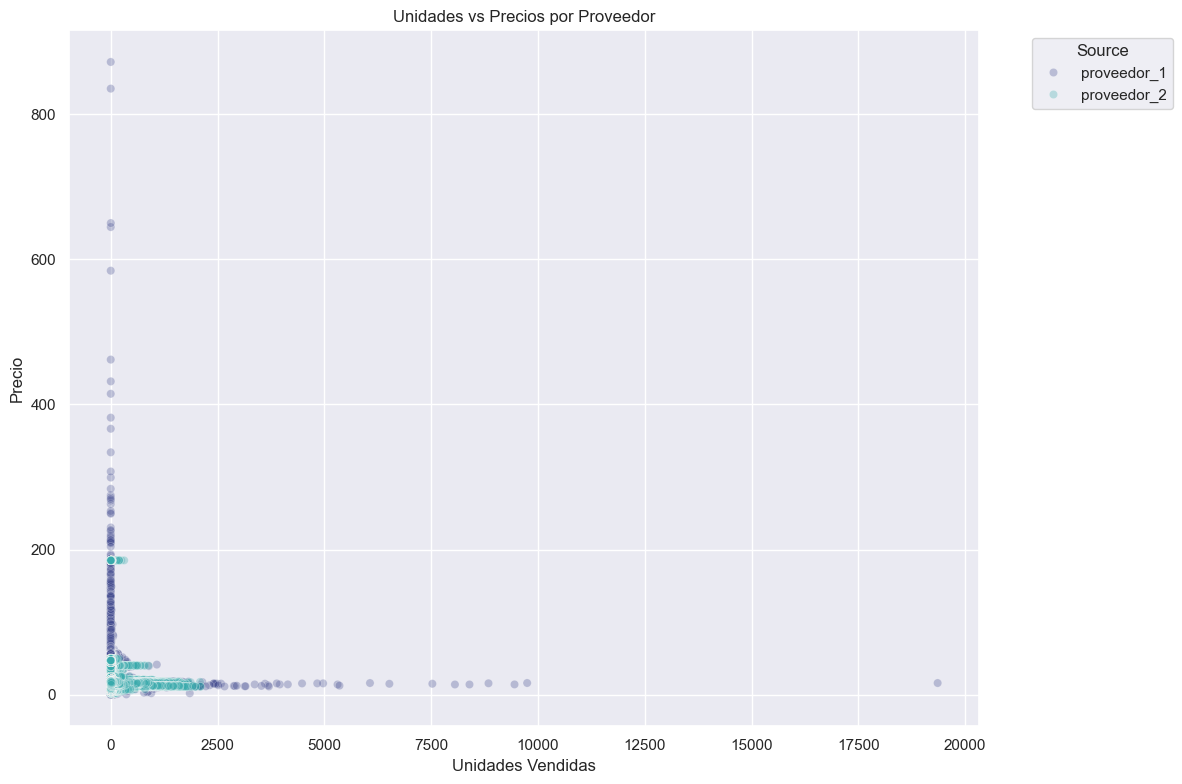

In [28]:

plt.figure(figsize=(12, 8))
sns.scatterplot(data=sellout_Fact_filtrado, x='Units', y='Price', hue='Source', palette='mako', alpha=0.3)

plt.title('Unidades vs Precios por Proveedor')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Precio')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [29]:
sellout_Fact_filtrado.columns.values

array(['Sku', 'Date', 'Store_Id', 'Units', 'Price', 'Source',
       'Sku_Description', 'Sku_Category', 'Sku_Subcategory', 'LOG_Units',
       'LOG_Price'], dtype=object)

In [ ]:
ventas_semanales

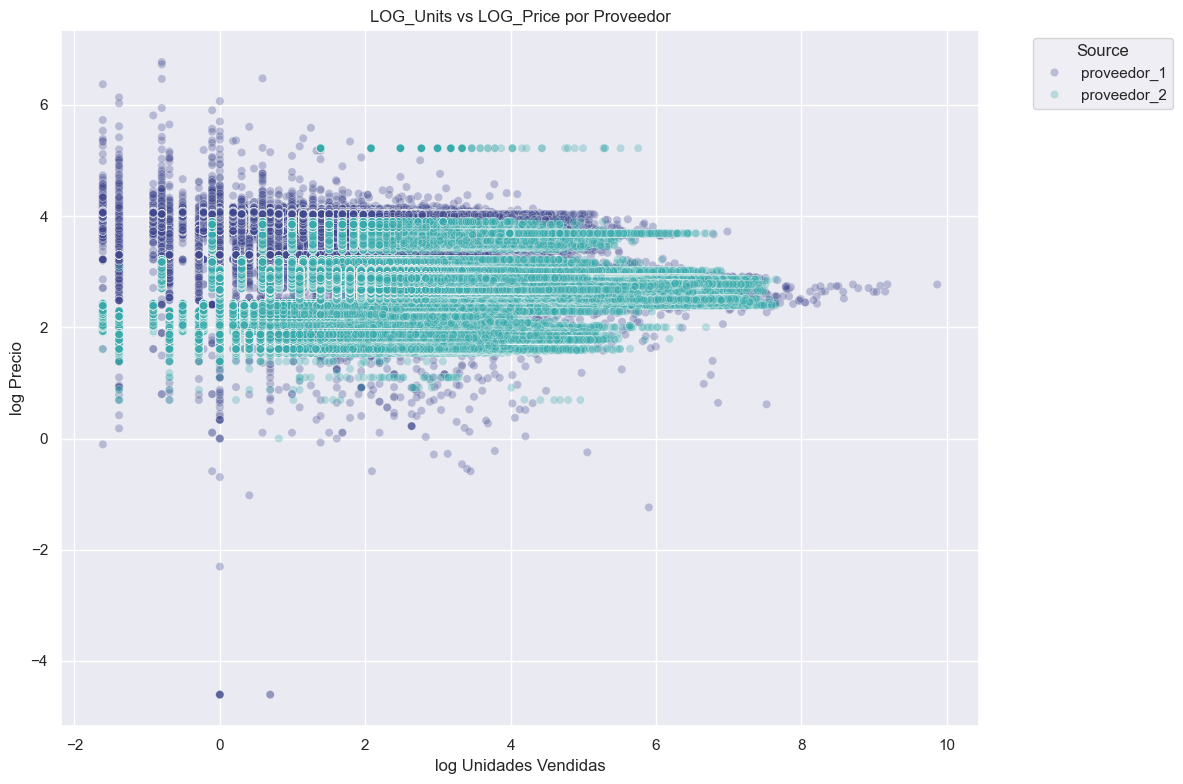

In [38]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sellout_Fact_filtrado, x='LOG_Units', y='LOG_Price', hue='Source', palette='mako', alpha=0.3)

plt.title('LOG_Units vs LOG_Price por Proveedor')
plt.xlabel('log Unidades Vendidas')
plt.ylabel('log Precio')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [42]:
# sellout_Fact_filtrado = sellout_Fact_filtrado.replace([np.inf, -np.inf], np.nan).dropna(subset=['LOG_Units', 'LOG_Price'])
sellout_Fact_filtrado['LOG_Units'] = np.log1p(sellout_Fact_filtrado['Units'])
sellout_Fact_filtrado['LOG_Price'] = np.log1p(sellout_Fact_filtrado['Price'])

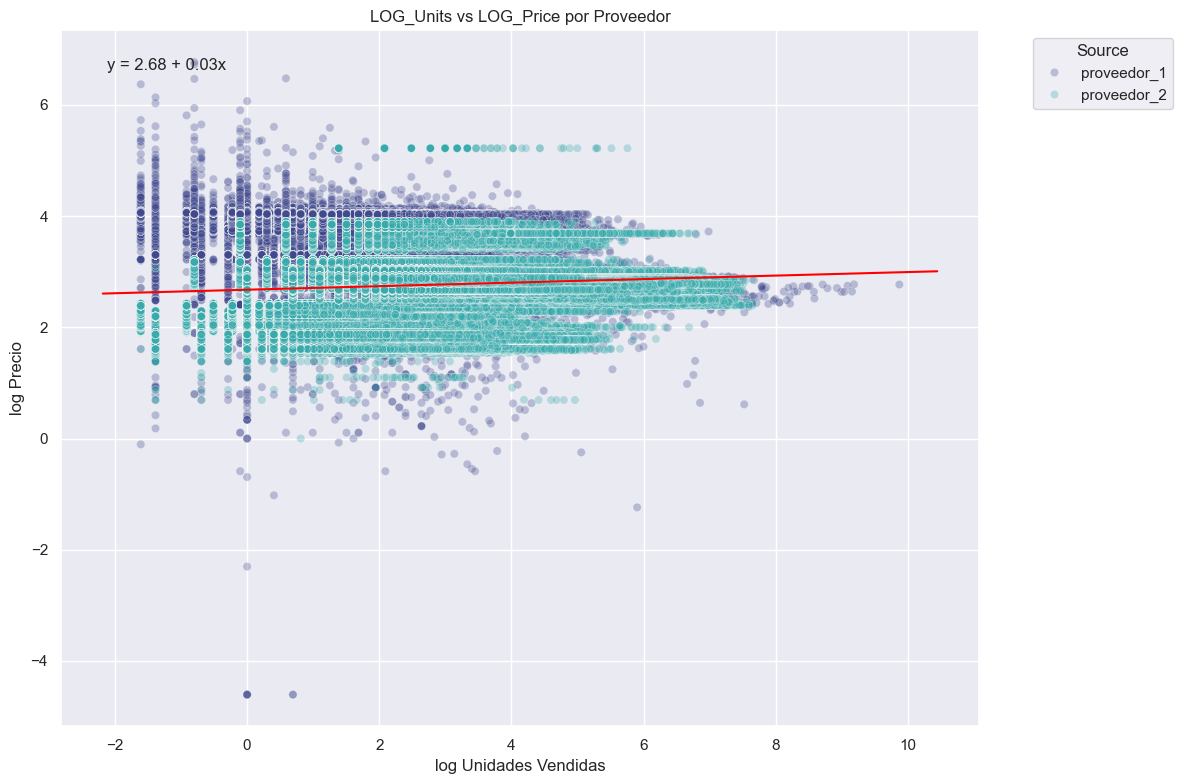

In [18]:
from scipy.stats import linregress

# Asegúrate de que los datos estén en el formato correcto
# Aquí se asume que `sellout_Fact_filtrado` ya tiene las columnas 'LOG_Units' y 'LOG_Price'
# Y que se ha aplicado el logaritmo a esas columnas previamente

# Calcular la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(sellout_Fact_filtrado['LOG_Units'], sellout_Fact_filtrado['LOG_Price'])

# Crear la figura
plt.figure(figsize=(12, 8))

# Crear el scatter plot
sns.scatterplot(data=sellout_Fact_filtrado, x='LOG_Units', y='LOG_Price', hue='Source', palette='mako', alpha=0.3)

# Agregar la línea de regresión manualmente
x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red')

# Mostrar la ecuación de la línea de regresión
plt.text(0.05, 0.95, f'y = {intercept:.2f} + {slope:.2f}x', ha='left', va='center', transform=plt.gca().transAxes)

# Configurar el resto de la gráfica
plt.title('LOG_Units vs LOG_Price por Proveedor')
plt.xlabel('log Unidades Vendidas')
plt.ylabel('log Precio')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


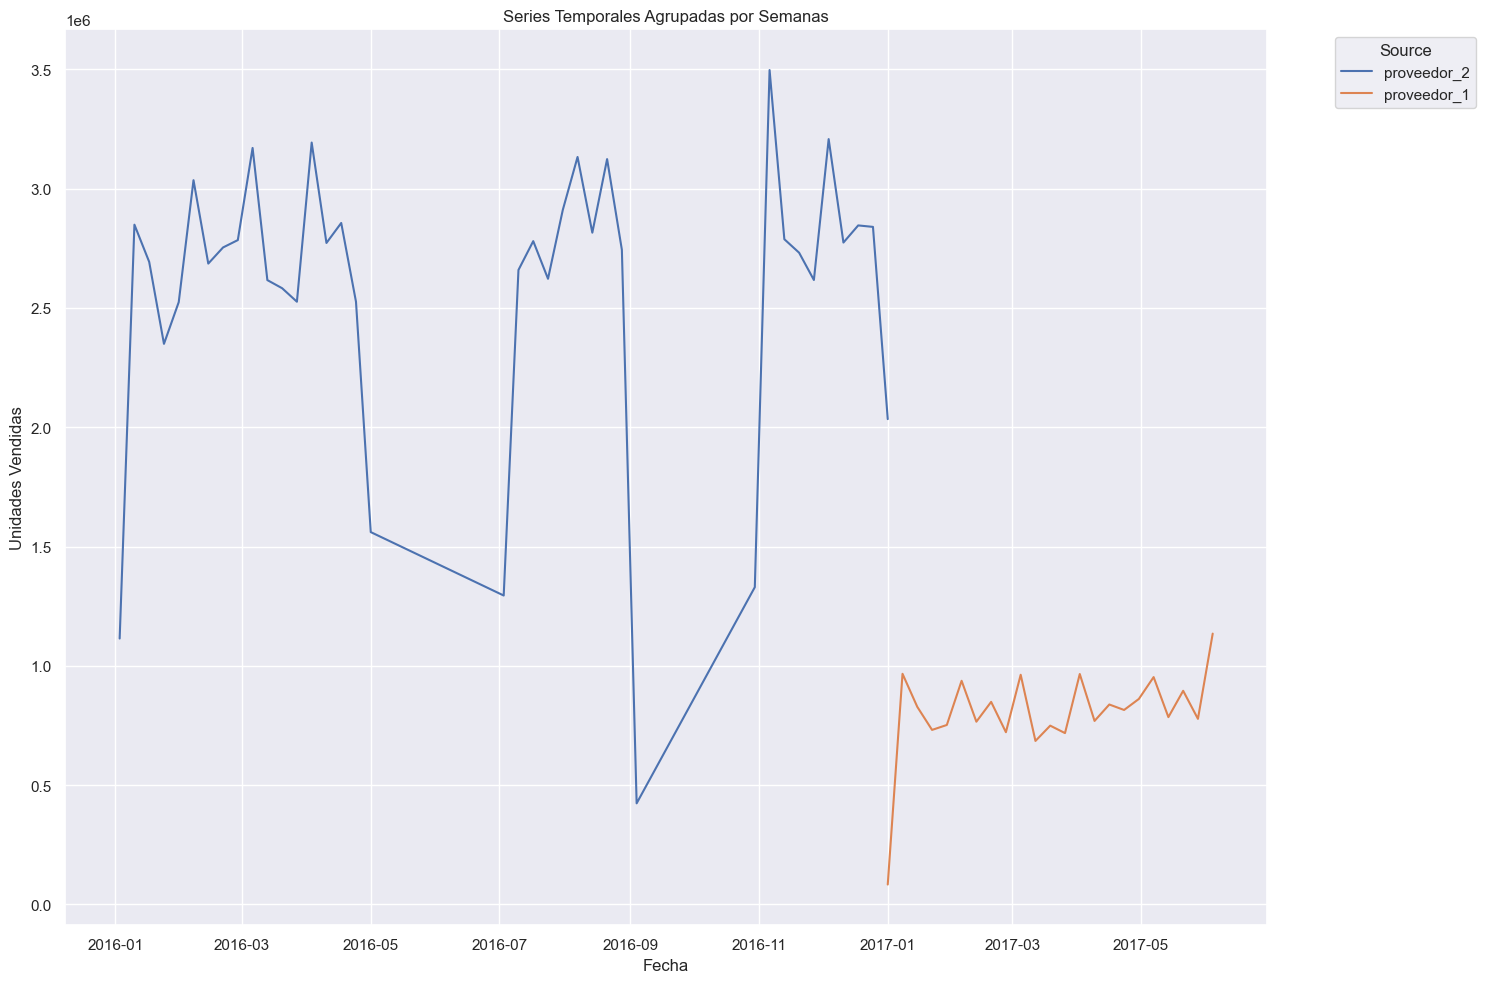

In [34]:
# Agrupar por semana ventas_semanales
ventas_semanales = sellout_Fact_filtrado.groupby([pd.Grouper(key='Date', freq='W'), 'Source'])['Units'].sum().reset_index()
plt.figure(figsize=(15, 10))

# Graficar cada serie temporal para cada Source
for Preovedor in ventas_semanales['Source'].unique():
    data = ventas_semanales[ventas_semanales['Source'] == Preovedor]
    sns.lineplot(data=data, x='Date', y='Units', label=Preovedor)

plt.title('Series Temporales Agrupadas por Semanas')
plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# weekly_data = sellout_Fact['Units'].resample('W').sum().reset_index()
# weekly_data

,Date,Units
0,2016-01-03,1114414.55
1,2016-01-10,2849078.40
2,2016-01-17,2693059.15
3,2016-01-24,2349599.70
4,2016-01-31,2524402.80
...,...,...
70,2017-05-07,952841.13
71,2017-05-14,785031.62
72,2017-05-21,895388.75
73,2017-05-28,777778.87


10:34:27 - cmdstanpy - INFO - Chain [1] start processing
10:34:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\ARMANDO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\ARMANDO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


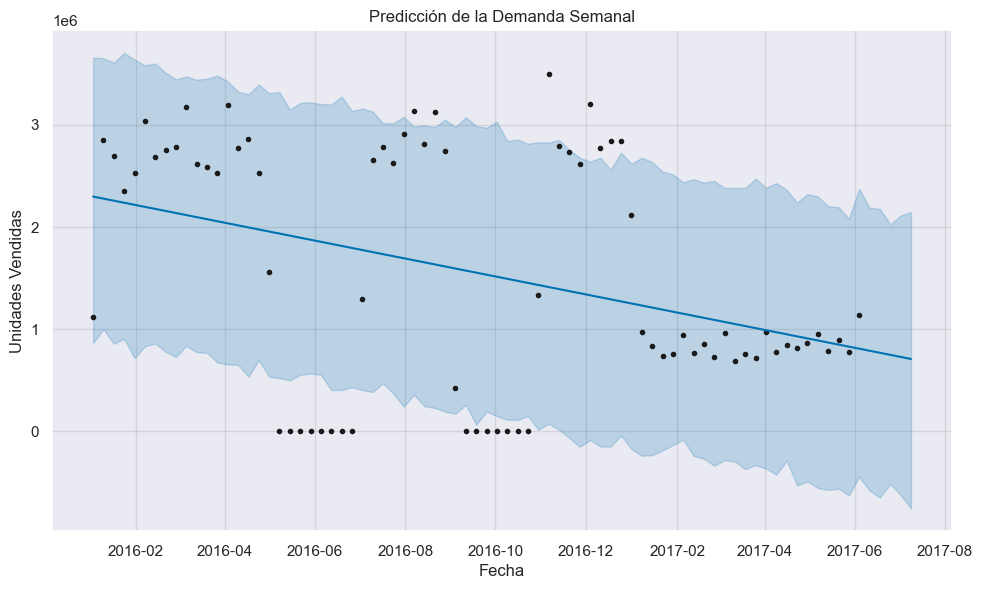

c:\Users\ARMANDO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


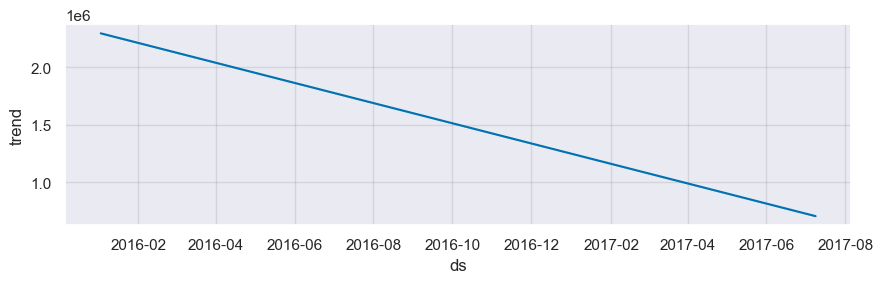

In [31]:
weekly_data.columns = ['ds', 'y']
from prophet import Prophet
model = Prophet()

model.fit(weekly_data)



# pronostico  5 semanas
future = model.make_future_dataframe(periods=5, freq='W')
forecast = model.predict(future)


fig = model.plot(forecast)
plt.title('Predicción de la Demanda Semanal')
plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas')
plt.grid(True)
plt.show()

fig2 = model.plot_components(forecast)
plt.show()


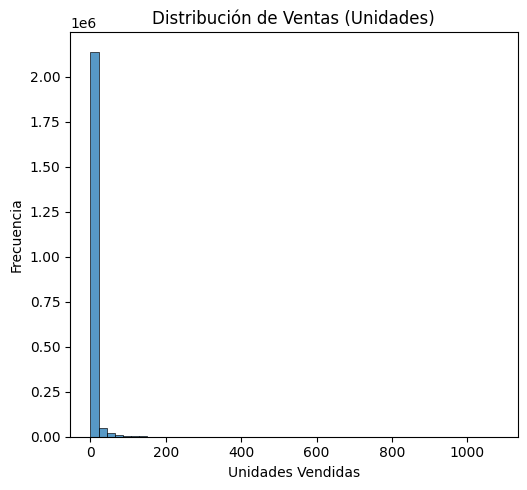

In [244]:
#para las barras de cereal
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

# histograma usando Seaborn
sns.histplot(ventas_Fact_sin_nan[ventas_Fact_sin_nan['Sku_Subcategory']=='Cereal box']['Units'], bins=50, kde=False)

# Personalizar el gráfico
plt.title('Distribución de Ventas (Unidades)')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frecuencia')

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

c:\Users\ARMANDO\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ARMANDO\AppData\Local\Temp\ipykernel_19144\1705087151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_Fact_sin_nan['log_units'] = np.log10(ventas_Fact_sin_nan['Units'])


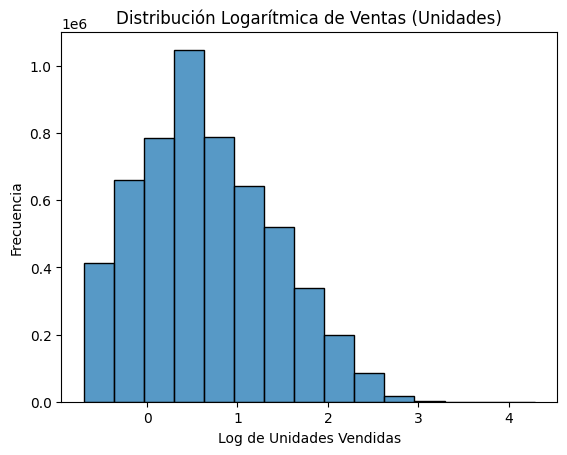

In [247]:
ventas_Fact_sin_nan['log_units'] = np.log10(ventas_Fact_sin_nan['Units'])
sns.histplot(ventas_Fact_sin_nan['log_units'], bins=15, kde=False)
plt.title('Distribución Logarítmica de Ventas (Unidades)')
plt.xlabel('Log de Unidades Vendidas')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\ARMANDO\AppData\Local\Temp\ipykernel_19144\1782344754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_Fact_sin_nan['log10_Units'] = np.log10(ventas_Fact_sin_nan['Units'] + 1)
C:\Users\ARMANDO\AppData\Local\Temp\ipykernel_19144\1782344754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_Fact_sin_nan['log10_Price'] = np.log10(ventas_Fact_sin_nan['Price'] + 1)


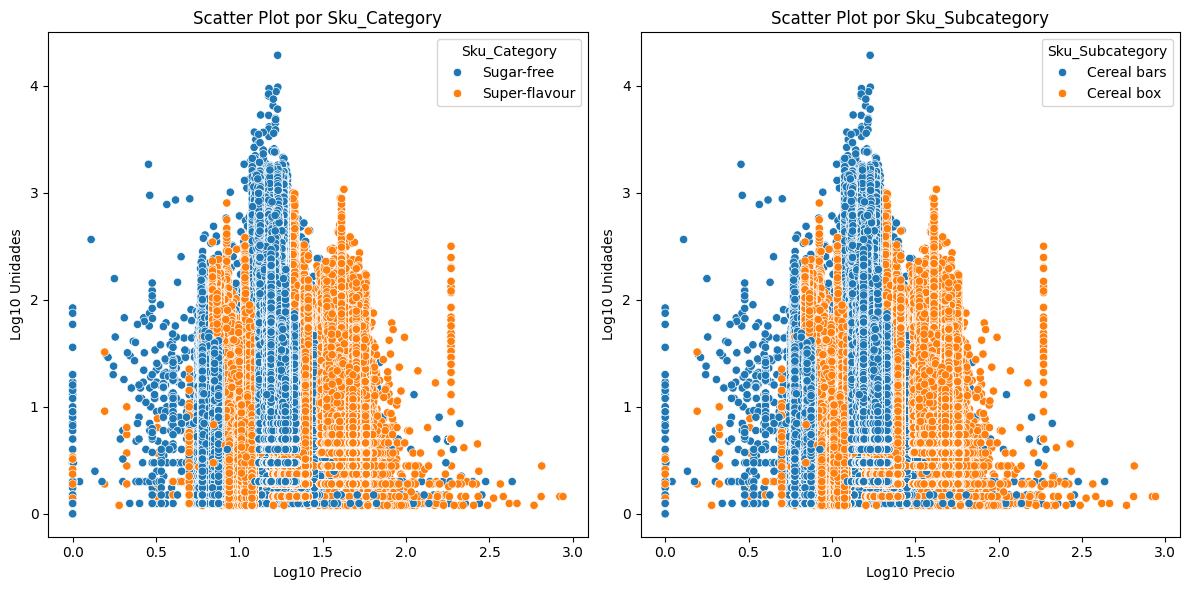

In [248]:
# Aplicar la transformación logarítmica
ventas_Fact_sin_nan['log10_Units'] = np.log10(ventas_Fact_sin_nan['Units'] + 1)
ventas_Fact_sin_nan['log10_Price'] = np.log10(ventas_Fact_sin_nan['Price'] + 1)

# Crear el scatter plot
plt.figure(figsize=(12, 6))

# Scatter plot para Sku_Category
plt.subplot(1, 2, 1)
sns.scatterplot(data=ventas_Fact_sin_nan, x='log10_Price', y='log10_Units', hue='Sku_Category')
plt.title('Scatter Plot por Sku_Category')
plt.xlabel('Log10 Precio')
plt.ylabel('Log10 Unidades')

# Scatter plot para Sku_Subcategory
plt.subplot(1, 2, 2)
sns.scatterplot(data=ventas_Fact_sin_nan, x='log10_Price', y='log10_Units', hue='Sku_Subcategory')
plt.title('Scatter Plot por Sku_Subcategory')
plt.xlabel('Log10 Precio')
plt.ylabel('Log10 Unidades')

# Mostrar la figura
plt.tight_layout()
plt.show()